In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 43.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

df = pd.read_parquet("all_organisms_footprints.parquet")

print(f"Liczba wierszy: {len(df)}")
print("\nTypy danych:")
print(df.dtypes)

print("\nPodgląd danych:")
display(df.head())

print("\nPrzykładowe dane grafowe (pierwszy rekord):")
sample_graph = df.iloc[0]['graph_data']
print(sample_graph)

Liczba wierszy: 2402218

Typy danych:
input_smiles        object
meta_organism       object
meta_confidence      int16
target_pIC50       float64
graph_data          object
dtype: object

Podgląd danych:


,input_smiles,meta_organism,meta_confidence,target_pIC50,graph_data
0,COC(=O)c1cccc(-c2c(Cl)nc(NC(C)C)c(=O)n2CC(=O)N...,Homo sapiens,8,5.70,"{'atom_features': [6, 8, 6, 8, 6, 6, 6, 6, 6, ..."
1,CCN1C(=O)Cc2cc(CCN3CCN(c4cccc5ccccc45)CC3)ccc21,Rattus norvegicus,9,8.54,"{'atom_features': [6, 6, 7, 6, 8, 6, 6, 6, 6, ..."
2,CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H]1COCCC...,Mus musculus,8,4.00,"{'atom_features': [6, 6, 6, 6, 6, 7, 6, 8, 6, ..."
3,CC[C@@H]1C(O)SC[C@@H]1Cc1cncn1C,Rattus norvegicus,4,6.15,"{'atom_features': [6, 6, 6, 6, 8, 16, 6, 6, 6,..."
4,CC[C@@H]1C(O)SC[C@@H]1Cc1cncn1C,Rattus norvegicus,4,6.15,"{'atom_features': [6, 6, 6, 6, 8, 16, 6, 6, 6,..."



Przykładowe dane grafowe (pierwszy rekord):
{'atom_features': array([ 6,  8,  6,  8,  6,  6,  6,  6,  6,  6,  6, 17,  7,  6,  7,  6,  6,
        6,  6,  8,  7,  6,  6,  8,  7,  6,  6,  6,  6,  6,  6,  7,  7,  6,
        6,  6], dtype=int32), 'edge_src': array([ 0,  1,  1,  2,  2,  3,  2,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
        9,  9, 10, 10, 11, 10, 12, 12, 13, 13, 14, 14, 15, 15, 16, 15, 17,
       13, 18, 18, 19, 18, 20, 20, 21, 21, 22, 22, 23, 22, 24, 24, 25, 25,
       26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 30, 32, 29, 33, 33, 34,
        8, 35, 35,  4, 20,  9, 34, 26], dtype=int32), 'edge_dst': array([ 1,  0,  2,  1,  3,  2,  4,  2,  5,  4,  6,  5,  7,  6,  8,  7,  9,
        8, 10,  9, 11, 10, 12, 10, 13, 12, 14, 13, 15, 14, 16, 15, 17, 15,
       18, 13, 19, 18, 20, 18, 21, 20, 22, 21, 23, 22, 24, 22, 25, 24, 26,
       25, 27, 26, 28, 27, 29, 28, 30, 29, 31, 30, 32, 30, 33, 29, 34, 33,
       35,  8,  4, 35,  9, 20, 26, 34], dtype=int32)}


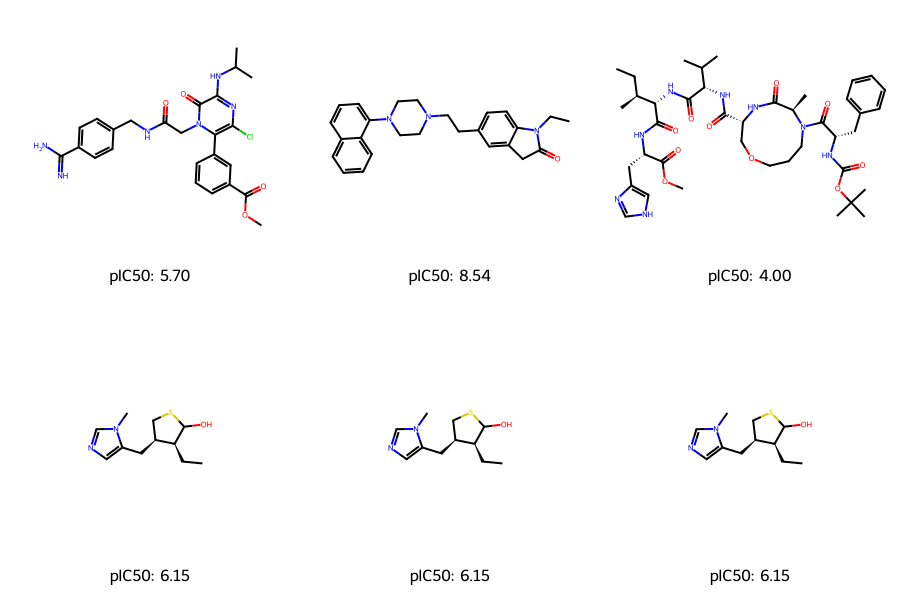

In [3]:
smiles_list = df['input_smiles'].head(6).tolist()
pIC50_list = df['target_pIC50'].head(6).tolist()

mols = [Chem.MolFromSmiles(s) for s in smiles_list]

img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(300, 300),
    legends=[f"pIC50: {x:.2f}" for x in pIC50_list]
)

display(img)